<a href="https://colab.research.google.com/github/Sriram4207/Elevatelabs-task2/blob/main/task-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB

Missing values per column:
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Cleaned & encoded data (first 5 rows):
      carat     depth     table     price         x         y         z  \
0  0.006237  0.513889  0.230769  0.000000  0.031384  0.005433  0.044256   
1  0.002079 

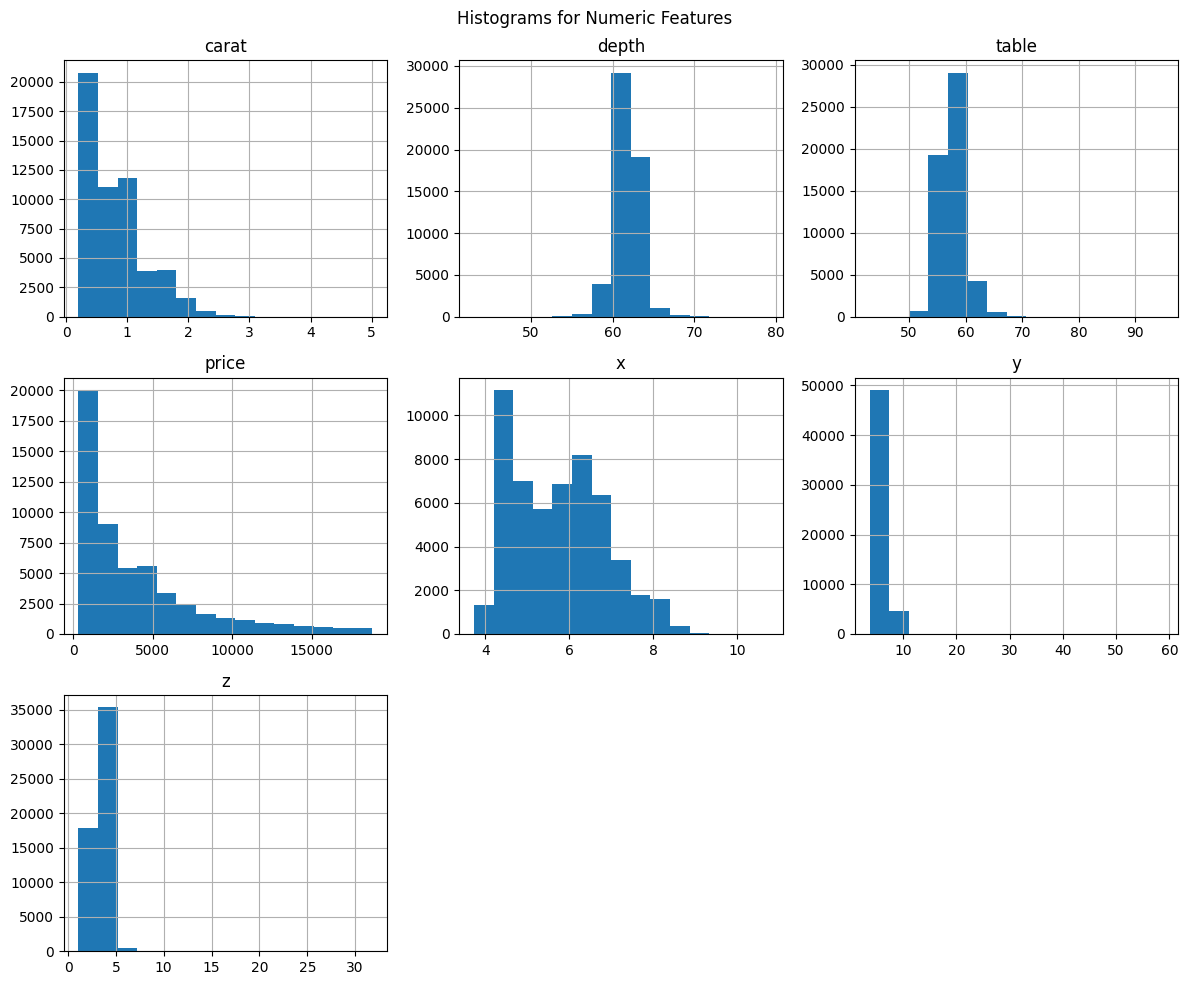

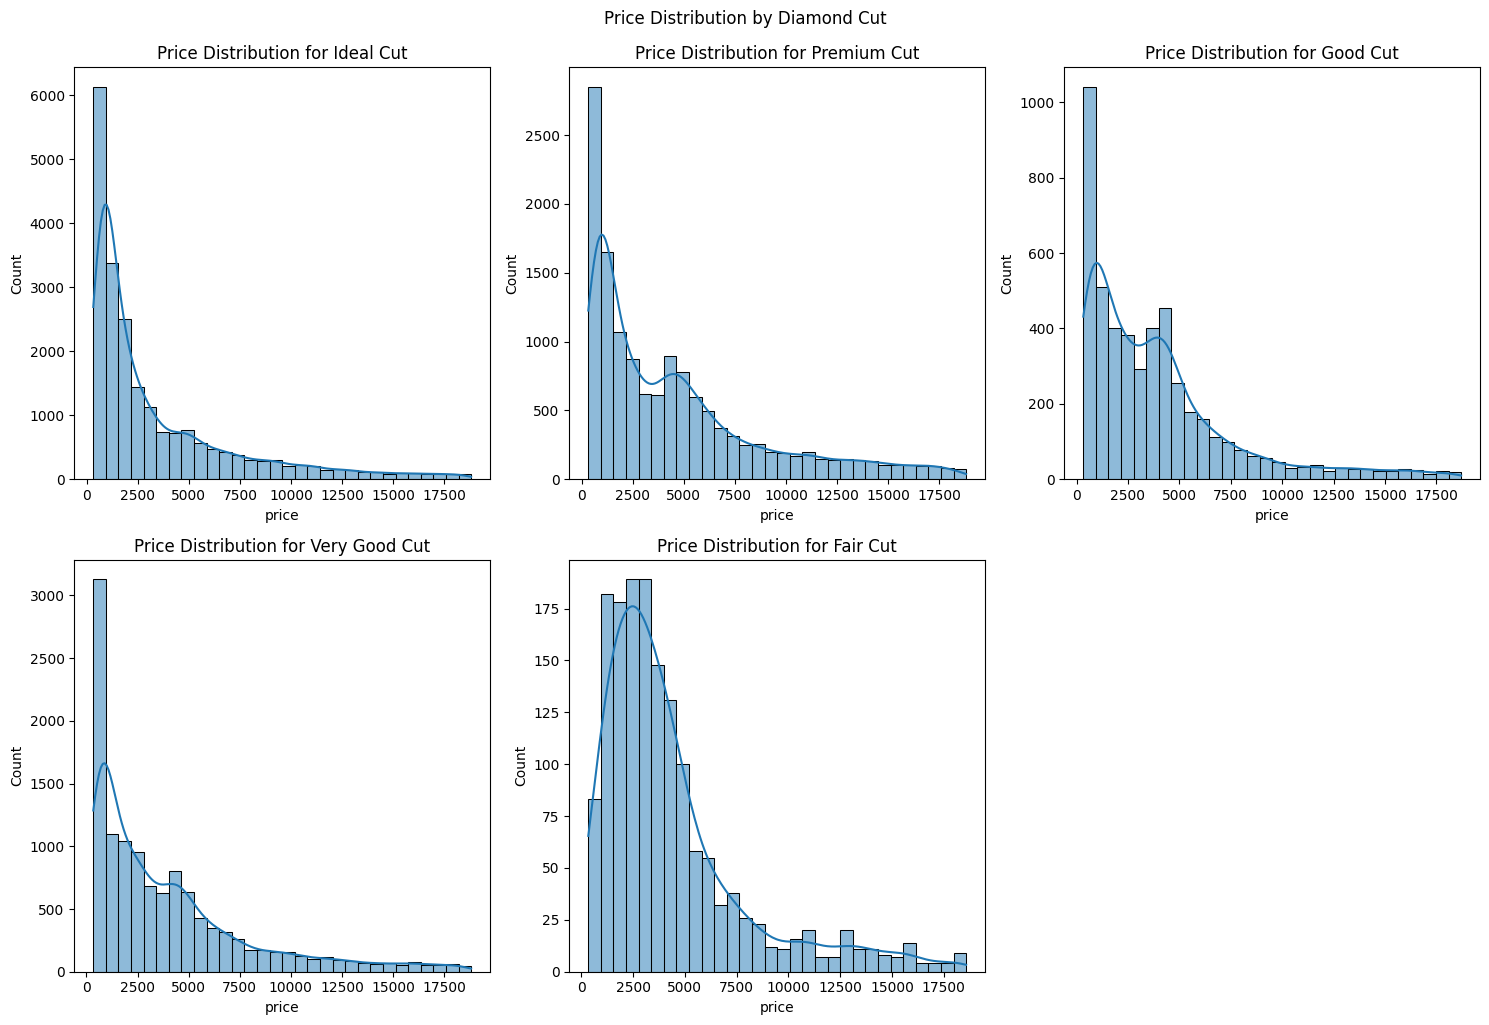

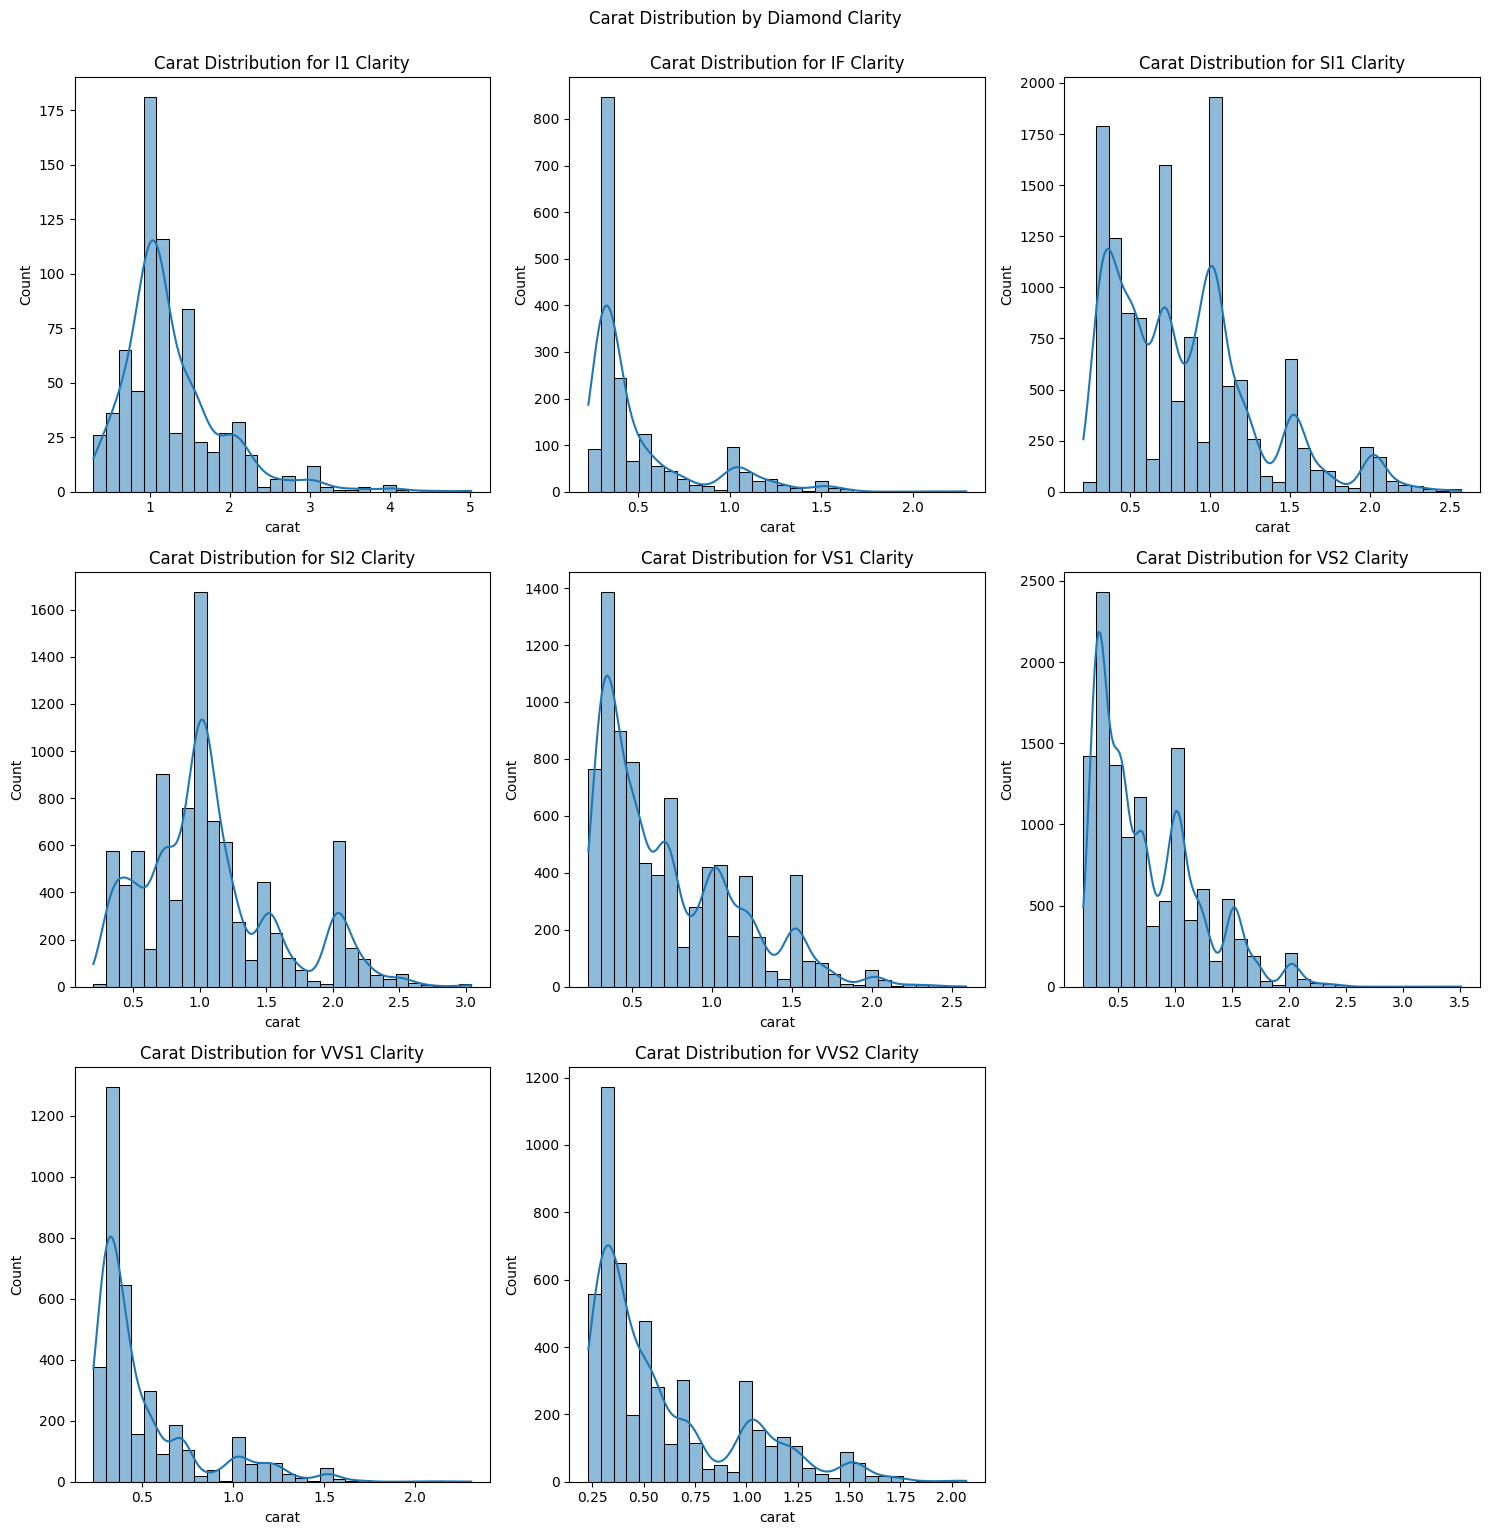


Average price by cut:
 cut
Fair         4340.677520
Good         3916.279051
Ideal        3462.148150
Premium      4578.913809
Very Good    3980.920202
Name: price, dtype: float64

Average carat by clarity:
 clarity
I1      1.283826
IF      0.505645
SI1     0.850196
SI2     1.076018
VS1     0.727386
VS2     0.764057
VVS1    0.503505
VVS2    0.596527
Name: carat, dtype: float64


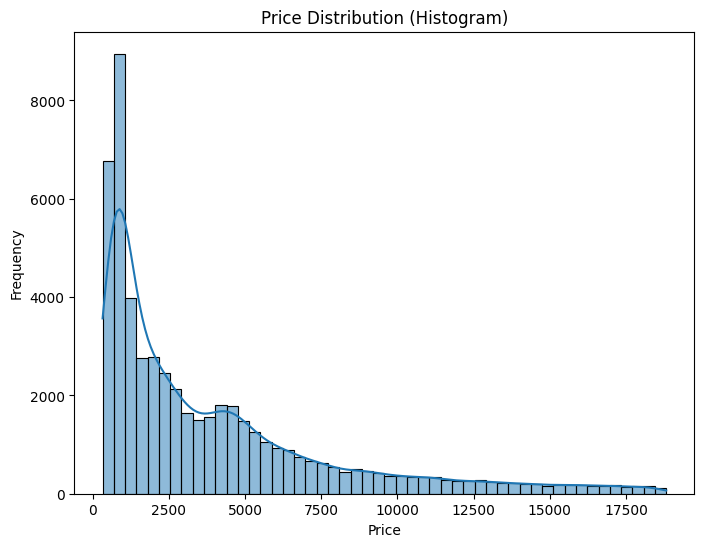

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# STEP 1: DATA CLEANING & PREPROCESSING

# Load diamonds dataset
diamonds = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv')

# Inspect structure
diamonds.info()

# Check for missing values
print("\nMissing values per column:")
print(diamonds.isnull().sum())

# Remove rows with impossible physical dimensions
diamonds = diamonds[(diamonds['x'] > 0) & (diamonds['y'] > 0) & (diamonds['z'] > 0)]

# Remove duplicate rows
diamonds = diamonds.drop_duplicates()

# One-hot encode categorical features
diamonds_enc = pd.get_dummies(diamonds, columns=['cut', 'color', 'clarity'])

# Normalize numeric features
num_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
scaler = MinMaxScaler()
diamonds_enc[num_cols] = scaler.fit_transform(diamonds_enc[num_cols])

print("\nCleaned & encoded data (first 5 rows):")
print(diamonds_enc.head())

# STEP 2: EXPLORATORY DATA ANALYSIS

# Summary statistics for original (interpretable) data
print("\nSummary statistics (original data):\n", diamonds.describe())
print("\nValue counts for 'cut':\n", diamonds['cut'].value_counts())
print("\nValue counts for 'color':\n", diamonds['color'].value_counts())
print("\nValue counts for 'clarity':\n", diamonds['clarity'].value_counts())

# Histograms for numeric features
diamonds[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].hist(bins=15, figsize=(12,10))
plt.suptitle('Histograms for Numeric Features')
plt.tight_layout()
plt.show()

# Histograms: Price by Cut (converted from boxplot)
plt.figure(figsize=(15, 10))
unique_cuts = diamonds['cut'].unique()
n_cuts = len(unique_cuts)
rows = (n_cuts + 2) // 3 # Calculate rows needed for 3 columns
for i, cut_type in enumerate(unique_cuts):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(diamonds[diamonds['cut'] == cut_type]['price'], kde=True, bins=30)
    plt.title(f'Price Distribution for {cut_type} Cut')
plt.tight_layout()
plt.suptitle('Price Distribution by Diamond Cut', y=1.02)
plt.show()

# Histograms: Carat by Clarity (converted from boxplot)
plt.figure(figsize=(15, 15))
unique_clarities = sorted(diamonds['clarity'].unique())
n_clarities = len(unique_clarities)
rows_clarity = (n_clarities + 2) // 3 # Calculate rows needed for 3 columns
for i, clarity_type in enumerate(unique_clarities):
    plt.subplot(rows_clarity, 3, i + 1)
    sns.histplot(diamonds[diamonds['clarity'] == clarity_type]['carat'], kde=True, bins=30)
    plt.title(f'Carat Distribution for {clarity_type} Clarity')
plt.tight_layout()
plt.suptitle('Carat Distribution by Diamond Clarity', y=1.02)
plt.show()

# Pairplot has been removed as it includes scatterplots which are not histograms.

# Correlation matrix and heatmap have been removed as they cannot be represented as histograms.

# Grouped means for feature insights
print("\nAverage price by cut:\n", diamonds.groupby('cut')['price'].mean())
print("\nAverage carat by clarity:\n", diamonds.groupby('clarity')['carat'].mean())

# Histogram for Price distribution (converted from outlier detection boxplot)
plt.figure(figsize=(8, 6))
sns.histplot(diamonds['price'], kde=True, bins=50)
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()